In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
seed = 0 
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('data/wine.csv')
df = df_pre.sample(frac=0.5)

In [4]:
dataset = df.values
print(dataset.dtype) 

float64


In [5]:
X = dataset[:,:12]
Y = dataset[:,12]

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
#이진 분류이므로 sigmoid를 쓴다. 

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [8]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    #해당 폴더의 존재유무를 체크해준다. 

modelpath = './model/{epoch: 02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose=1,
                              save_best_only=True)
#학습을 진행하면서 말그대로 체크를 하는데, 체크해서 결과를 저장할 파일 패스를 넣어준거고, 저장하면서 
#val_loss값을 체크하고, verbose=1은 중간과정을 출력하도록한다.  
#여기서 val_loss는 하단 셀의 validation_split을 통해 나온 값을 말한다. 
#save_best_only=True는 모델이 향상될 때에만 저장을 하라는 옵션이다. 

Epoch 1/3500
5/5 [==============================] - 0s 27ms/step - loss: 1.5339 - accuracy: 0.7459 - val_loss: 0.7805 - val_accuracy: 0.7612
Epoch 2/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.7323 - accuracy: 0.6994 - val_loss: 0.6627 - val_accuracy: 0.6399
Epoch 3/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.5774 - accuracy: 0.7082 - val_loss: 0.4970 - val_accuracy: 0.7621
Epoch 4/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.7477 - val_loss: 0.4686 - val_accuracy: 0.7687
Epoch 5/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7592 - val_loss: 0.3796 - val_accuracy: 0.8022
Epoch 6/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8024 - val_loss: 0.3730 - val_accuracy: 0.8554
Epoch 7/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8396 - val_loss: 0.3330 - val_accuracy: 0.8666
Epoch 8/3500
5/5 [=

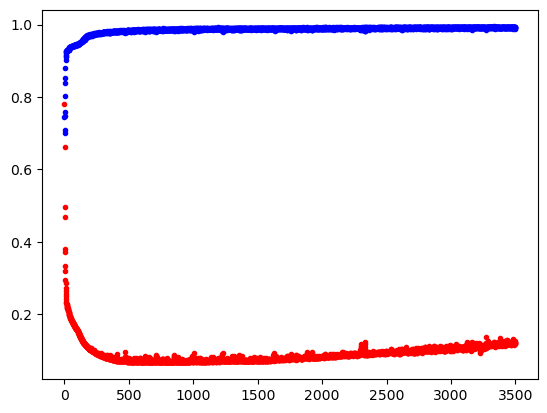

In [9]:
history = model.fit(X,Y, validation_split=0.33 ,epochs = 3500, batch_size=500)
#fit 결과 최하단에 이런 주소를 던져준다. <tensorflow.python.keras.callbacks.History at 0x12c53469460>
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize=3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize=3)
plt.show()

In [10]:
##여기서 빨간 점들은 500~ 700사이부터 값이 증가하는데 이게 이 지점부터 과적합이 발생하는것으로 볼수 있는것이다. 
##그러므로 적절한 epoch수는 500~700사이가 되므로 
##모델을 만들때 이러한 그래프를 먼저 만들어 참고한 후에 epoch수를 찾을 수 있다는것이다. 